## Artificial Intelligence Assignment 1
## 2번 : 다차항회귀
## 20132651 Sungjae Lee

In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
# 다차항회귀를 위한 numpy 와 시각화를 위한 matplotlib 패키지를 가져옵니다

In [2]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)
# 비선형 데이터를 난수를 활용하여 X 와 y로 생성합니다

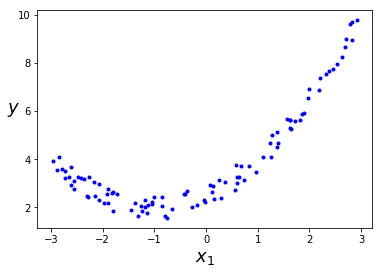

In [3]:
# 1. 화면 출력 확인
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.show()
# 생성한 데이터를 산점도 그래프로 표현합니다

In [4]:
from sklearn.preprocessing import PolynomialFeatures
# sklearn 의 PolynomialFeatures 를 활용하여 다차항회귀를 진행합니다

In [5]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [6]:
# 2. X[0] 출력 확인
print(X[0])

[-0.75275929]


In [7]:
# 3. X_poly[0] 출력 확인
print(X_poly[0])

[-0.75275929  0.56664654]


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
# 4. lin_reg.intercept_, lin_reg.coef_ 출력 확인
print(lin_reg.intercept_)
print(lin_reg.coef_)

[2.49786712]
[[0.9943591  0.49967213]]


In [11]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

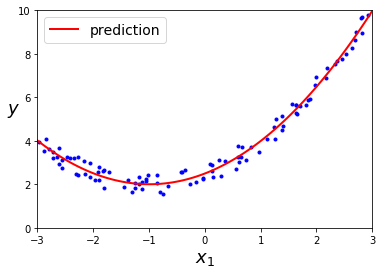

In [12]:
# 5. 화면 출력 확인
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth = 2, label = "prediction")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.legend(loc = "upper left", fontsize = 14)
plt.axis([-3, 3, 0, 10])
plt.show()
# 생성된 예측 곡선과 데이터를 비교하는 그래프를 그립니다

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

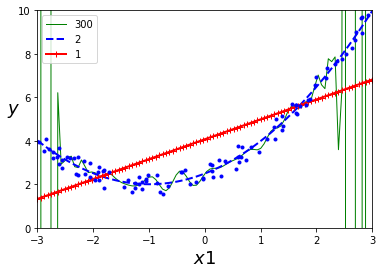

In [14]:
# 6. 화면 출력 확인
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label = str(degree), linewidth = width)
plt.plot(X, y, "b.", linewidth = 3)
plt.legend(loc = "upper left")
plt.xlabel("$x1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([-3, 3, 0, 10])
plt.show()
# 차수가 1차, 2차, 300차 일 때 과소적합 및 과대적합 여부를 봅니다
# 2차 곡선을 이용한 예측이 가장 정확하게 데이터를 표현하는 점을 볼 수 있습니다
# 300차 곡선에서는 과대적합이, 1차 곡선에서는 과소적합이 발생합니다